<a href="https://colab.research.google.com/github/divyanshuraj1095/Cat-Vs-Dog-Classification-with-NN/blob/main/Dog_vs_Cat_Classification_using_Trasfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Transfer Learning is a deep learning technique where we use a pre-trained model.This pre-trained is trained for one task and can be re-trained for a similar task with smaller datasets**

It gives higher accuracy compared to training models from scratch.

In [ ]:
!pip install kaggle

In [ ]:
#configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

## Importing the Dog vs Cat datasets from kaggle

In [ ]:
#kaggle api
!kaggle competitions download -c dogs-vs-cats

 97% 789M/812M [00:03<00:00, 209MB/s]
100% 812M/812M [00:07<00:00, 110MB/s]


In [ ]:
!ls


dogs-vs-cats.zip  kaggle.json  sample_data


In [ ]:
# extracting the compressed datasets
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
# extracting the compressed datasets
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
#counting the number of files in trained folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of Images: ',file_count)


Number of Images:  25000


## Printing the name of Images

In [ ]:
file_names = os.listdir('/content/train')
print(file_names)

['cat.1206.jpg', 'cat.10563.jpg', 'cat.11224.jpg', 'cat.2152.jpg', 'cat.1972.jpg', 'dog.1554.jpg', 'dog.9284.jpg', 'cat.5306.jpg', 'dog.7842.jpg', 'cat.8778.jpg', 'dog.8537.jpg', 'cat.1003.jpg', 'cat.757.jpg', 'cat.1398.jpg', 'cat.4075.jpg', 'cat.2891.jpg', 'cat.9562.jpg', 'cat.6307.jpg', 'cat.9734.jpg', 'dog.8532.jpg', 'cat.11756.jpg', 'dog.7929.jpg', 'dog.9455.jpg', 'dog.475.jpg', 'dog.2233.jpg', 'cat.9926.jpg', 'dog.7630.jpg', 'dog.6499.jpg', 'dog.200.jpg', 'cat.10436.jpg', 'dog.8273.jpg', 'dog.10832.jpg', 'cat.4122.jpg', 'dog.11984.jpg', 'cat.2949.jpg', 'cat.9165.jpg', 'dog.4000.jpg', 'dog.12030.jpg', 'cat.5485.jpg', 'cat.4780.jpg', 'dog.4008.jpg', 'dog.7198.jpg', 'dog.12337.jpg', 'dog.3987.jpg', 'cat.3257.jpg', 'dog.4797.jpg', 'dog.8908.jpg', 'cat.10951.jpg', 'dog.3888.jpg', 'dog.4568.jpg', 'cat.8257.jpg', 'dog.10004.jpg', 'dog.8505.jpg', 'dog.8394.jpg', 'cat.2099.jpg', 'dog.6275.jpg', 'cat.11725.jpg', 'cat.11154.jpg', 'cat.11197.jpg', 'cat.3602.jpg', 'dog.11849.jpg', 'dog.911.jpg

Importing the dependencies

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

## Displaying the images of dogs and cats

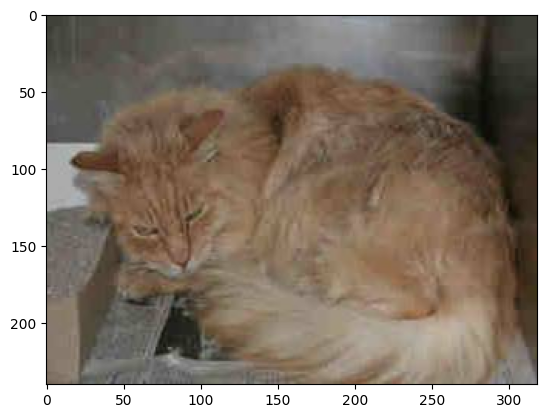

In [ ]:
#display cat image
img = mpimg.imread('/content/train/cat.10563.jpg')
imgplt = plt.imshow(img)
plt.show()


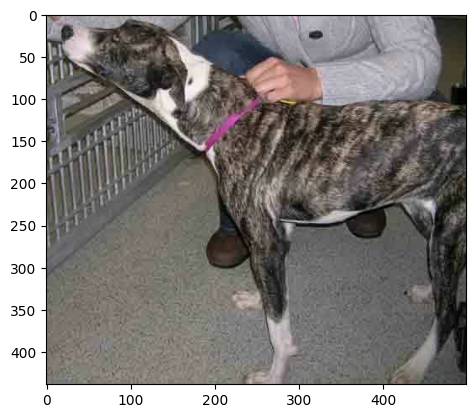

In [ ]:
#display dog image
img = mpimg.imread('/content/train/dog.6516.jpg')
imgplt = plt.imshow(img)
plt.show()


In [ ]:
file_names = os.listdir('/content/train')

for i in range((5)):
  name = file_names[i]
  print(name[0:3])

cat
cat
cat
cat
cat


In [ ]:
file_names = os.listdir('/content/train')

dog_count = 0
cat_count = 0

for img_file in file_names:



  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1
  elif name == 'cat':
    cat_count += 1

print('Number of Dogs: ',dog_count)
print('Number of Cats: ',cat_count)

Number of Dogs:  12500
Number of Cats:  12500


## Resizing all the images

In [ ]:
#creating a directory for resized images
os.mkdir('/content/image_resized')

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image_resized/'

for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder + filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath = resized_folder + filename
  img.save(newImgPath)

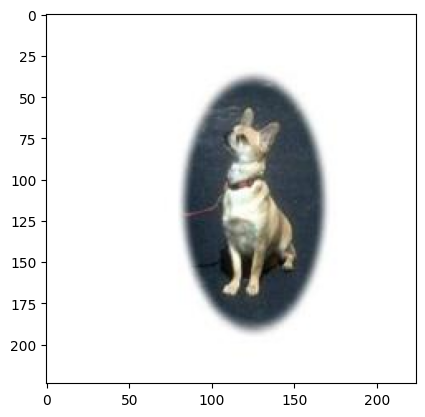

In [ ]:
#display dog image
img = mpimg.imread('/content/image_resized/dog.3753.jpg')
imgplt = plt.imshow(img)
plt.show()


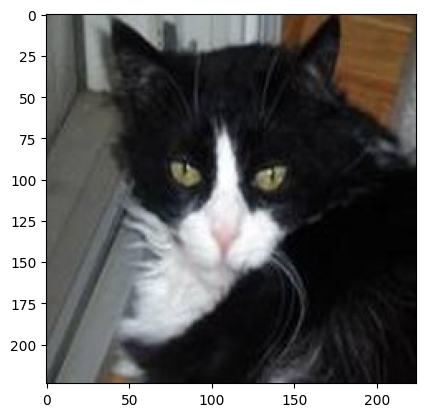

In [ ]:
#display cat image
img = mpimg.imread('/content/image_resized/cat.4876.jpg')
imgplt = plt.imshow(img)
plt.show()


## Creating lables for images of dogs and cats


cat---> 0
dog---> 1

In [ ]:
#creating a for loop to assign lables
filenames = os.listdir('/content/image_resized')
lables = []

for i in range(2000):
  file_name = filenames[i]
  lable = file_name[0:3]

  if lable == 'dog':
    lables.append(1)
  else:
    lables.append(0)


In [ ]:
print(lables[0:10])
print(len(lables))

[0, 0, 0, 0, 0, 1, 1, 0, 1, 0]
2000


In [ ]:
#counting the images of images of dogs and cats out of 2000 images
values, counts = np.unique(lables, return_counts=True)
print(values)
print(counts)

[0 1]
[1027  973]


Converting all the resized images to numpy arrays

In [ ]:
import cv2
import glob

In [ ]:
image_directory = '/content/image_resized/'
image_extension = ['png','jpg']

files = []

[files.extend(glob.glob(image_directory + '*.'+ e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

[[[[ 44  39  36]
   [ 44  39  36]
   [ 44  39  36]
   ...
   [ 40  35  32]
   [ 40  35  32]
   [ 39  34  31]]

  [[ 40  35  32]
   [ 39  34  31]
   [ 39  34  31]
   ...
   [ 40  35  32]
   [ 40  35  32]
   [ 39  34  31]]

  [[ 39  34  31]
   [ 37  32  29]
   [ 36  31  28]
   ...
   [ 41  36  33]
   [ 40  35  32]
   [ 39  34  31]]

  ...

  [[158 172 178]
   [149 163 169]
   [147 161 167]
   ...
   [ 23  23  23]
   [ 25  25  25]
   [ 25  25  25]]

  [[171 187 193]
   [156 172 178]
   [150 166 172]
   ...
   [ 24  24  24]
   [ 26  26  26]
   [ 27  27  27]]

  [[179 195 201]
   [163 179 185]
   [158 174 180]
   ...
   [ 24  24  24]
   [ 26  26  26]
   [ 28  28  28]]]


 [[[ 58  66  65]
   [ 57  65  64]
   [ 57  65  64]
   ...
   [ 54  62  61]
   [ 54  62  61]
   [ 54  62  61]]

  [[ 58  66  65]
   [ 57  65  64]
   [ 57  65  64]
   ...
   [ 54  62  61]
   [ 54  62  61]
   [ 54  62  61]]

  [[ 58  66  65]
   [ 57  65  64]
   [ 57  65  64]
   ...
   [ 54  62  61]
   [ 54  62  61]
   [ 54  62

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [ ]:
X = dog_cat_images
Y = np.asarray(lables)

## Train-Test Split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)


In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [ ]:
#scaling the data
X_trained_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
print(X_test_scaled)

[[[[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1. 

## Building the Neural Network

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tf_keras

In [ ]:
mobilenet_model= 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

feature_extractor = hub.KerasLayer(mobilenet_model,input_shape=(224,224,3),trainable=False)

In [ ]:
# Build using Functional API
inputs = tf.keras.Input(shape=(224, 224, 3))
x = feature_extractor(inputs)  # Don't print x or return it directly in a cell
outputs = tf.keras.layers.Dense(2, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

ValueError: Exception encountered when calling layer 'keras_layer_2' (type KerasLayer).

A KerasTensor is symbolic: it's a placeholder for a shape an a dtype. It doesn't have any actual numerical value. You cannot convert it to a NumPy array.

Call arguments received by layer 'keras_layer_2' (type KerasLayer):
  • inputs=<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, name=keras_tensor_3>
  • training=None

In [ ]:
model.compile(

              optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy']
)

model.summary()

In [ ]:
model.fit(X_trained_scaled,Y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 54s 970ms/step - loss: 0.2053 - acc: 0.9125
Epoch 2/5
50/50 [==============================] - 47s 932ms/step - loss: 0.0655 - acc: 0.9787
Epoch 3/5
50/50 [==============================] - 51s 1s/step - loss: 0.0481 - acc: 0.9837
Epoch 4/5
50/50 [==============================] - 48s 942ms/step - loss: 0.0364 - acc: 0.9894
Epoch 5/5
50/50 [==============================] - 47s 935ms/step - loss: 0.0294 - acc: 0.9912


In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss: ',score)
print('Test Accuracy: ',acc)

13/13 [==============================] - 13s 887ms/step - loss: 0.0645 - acc: 0.9800
Test Loss:  0.0645386129617691
Test Accuracy:  0.9800000190734863


## Predictive system

Path of the image to be predicted: /content/cheems chacha.jpeg


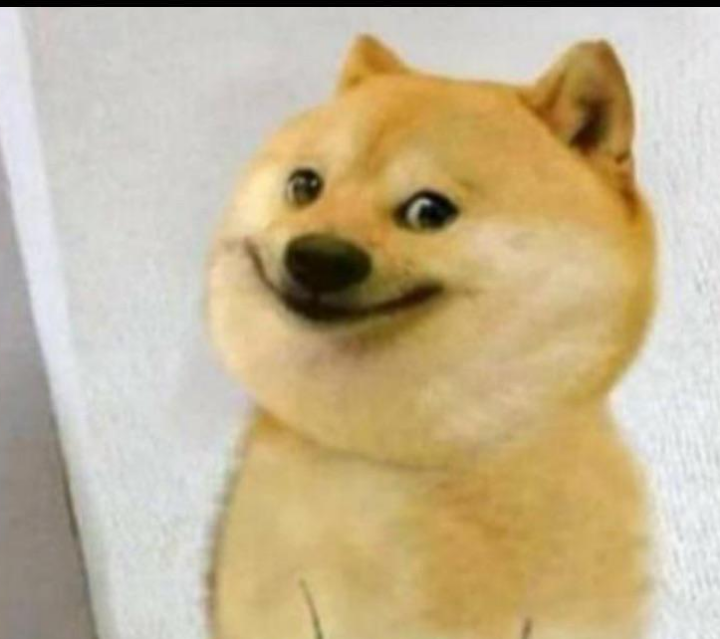

1/1 [==============================] - 1s 1s/step
The image represents a dog


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

if input_image is None:
  print("Error: Could not load image from the provided path. Please check the path and try again.")
else:
  cv2_imshow(input_image)

  input_image_resize = cv2.resize(input_image,(224,224))

  input_image_scaled = input_image_resize/255

  image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

  input_prediction = model.predict(image_reshaped)

  input_pred_label = np.argmax(input_prediction)

  if input_pred_label == 0:
    print('The image represents a cat')
  else:
    print('The image represents a dog')

## Saving the model to deploy

In [ ]:
model.save("model.keras")